In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../datasets/Kangaroo_cleaned.csv') # Load a CSV

In [3]:
df.head()

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


In [4]:
df.shape

(76370, 40)

In [5]:
df.columns


Index(['id', 'type', 'subtype', 'bedroomCount', 'bathroomCount', 'province',
       'locality', 'postCode', 'habitableSurface', 'roomCount', 'hasAttic',
       'hasBasement', 'hasDiningRoom', 'buildingCondition',
       'buildingConstructionYear', 'facedeCount', 'floorCount',
       'streetFacadeWidth', 'hasLift', 'floodZoneType', 'heatingType',
       'hasPhotovoltaicPanels', 'kitchenSurface', 'kitchenType', 'landSurface',
       'hasLivingRoom', 'livingRoomSurface', 'hasGarden', 'gardenSurface',
       'parkingCountIndoor', 'parkingCountOutdoor', 'hasVisiophone',
       'hasOffice', 'toiletCount', 'hasSwimmingPool', 'hasTerrace',
       'terraceSurface', 'terraceOrientation', 'epcScore', 'price'],
      dtype='object')

In [6]:
df_columns = df.columns.tolist()
df_columns

['id',
 'type',
 'subtype',
 'bedroomCount',
 'bathroomCount',
 'province',
 'locality',
 'postCode',
 'habitableSurface',
 'roomCount',
 'hasAttic',
 'hasBasement',
 'hasDiningRoom',
 'buildingCondition',
 'buildingConstructionYear',
 'facedeCount',
 'floorCount',
 'streetFacadeWidth',
 'hasLift',
 'floodZoneType',
 'heatingType',
 'hasPhotovoltaicPanels',
 'kitchenSurface',
 'kitchenType',
 'landSurface',
 'hasLivingRoom',
 'livingRoomSurface',
 'hasGarden',
 'gardenSurface',
 'parkingCountIndoor',
 'parkingCountOutdoor',
 'hasVisiophone',
 'hasOffice',
 'toiletCount',
 'hasSwimmingPool',
 'hasTerrace',
 'terraceSurface',
 'terraceOrientation',
 'epcScore',
 'price']

In [7]:
df.info() # Summary info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76370 entries, 0 to 76369
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        76370 non-null  float64
 1   type                      76370 non-null  object 
 2   subtype                   76370 non-null  object 
 3   bedroomCount              76370 non-null  float64
 4   bathroomCount             76370 non-null  float64
 5   province                  76370 non-null  object 
 6   locality                  76370 non-null  object 
 7   postCode                  76370 non-null  int64  
 8   habitableSurface          76370 non-null  float64
 9   roomCount                 76370 non-null  float64
 10  hasAttic                  76370 non-null  bool   
 11  hasBasement               76370 non-null  bool   
 12  hasDiningRoom             76370 non-null  bool   
 13  buildingCondition         76370 non-null  object 
 14  buildi

In [8]:
# Check for missing values
df.isnull().sum()

id                          0
type                        0
subtype                     0
bedroomCount                0
bathroomCount               0
province                    0
locality                    0
postCode                    0
habitableSurface            0
roomCount                   0
hasAttic                    0
hasBasement                 0
hasDiningRoom               0
buildingCondition           0
buildingConstructionYear    0
facedeCount                 0
floorCount                  0
streetFacadeWidth           0
hasLift                     0
floodZoneType               0
heatingType                 0
hasPhotovoltaicPanels       0
kitchenSurface              0
kitchenType                 0
landSurface                 0
hasLivingRoom               0
livingRoomSurface           0
hasGarden                   0
gardenSurface               0
parkingCountIndoor          0
parkingCountOutdoor         0
hasVisiophone               0
hasOffice                   0
toiletCoun

### sumary
- Shape: 80,368 x 53
- Some columns are likely unnecessary: url, id?, unnamed, 
- Many columns misses a lot information:
100%: monthlyCost, hasBalcony, accessibleDisabledPeople

## Data cleaning
1. Remove duplicate : No duplicates in data set
2. Remove irrelevant columns: URL, Unnamed:0, 
3. Remove columns missing a lot info


In [9]:
# df.duplicated().sum() # Check for duplicate rows
df.drop_duplicates(subset=['id'], keep='last', inplace=True)


In [12]:
# 1. Drop rows with NaN in price column
df.dropna(subset=['price'], how='all', inplace=True)
df_cleaned = df
df.shape

(76369, 40)

In [13]:
#3. Trim Whitespace in Strings

str_cols = df_cleaned.select_dtypes(include='object').columns #Selects columns that are of type string or mixed object
for col in str_cols:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

df_cleaned.describe(include='all') # Summary statistics of the data



,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,parkingCountOutdoor,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
count,7.636900e+04,76369,76369,76369.000000,76369.000000,76369,76369,76369.000000,76369.000000,76369.000000,...,76369.000000,76369,76369,76369.000000,76369,76369,76369.000000,76369,76369,7.636900e+04
unique,NaN,2,24,NaN,NaN,11,5397,NaN,NaN,NaN,...,NaN,1,1,NaN,1,1,NaN,8,20,NaN
top,NaN,HOUSE,HOUSE,NaN,NaN,West Flanders,Antwerpen,NaN,NaN,NaN,...,NaN,True,True,NaN,True,True,NaN,SOUTH,B,NaN
freq,NaN,45227,33971,NaN,NaN,14382,1630,NaN,NaN,NaN,...,NaN,76369,76369,NaN,76369,76369,NaN,68250,25090,NaN
mean,1.965699e+07,NaN,NaN,3.008564,1.372874,NaN,NaN,5230.872697,174.169310,6.319266,...,3.493499,NaN,NaN,1.860205,NaN,NaN,18.562126,NaN,NaN,4.476008e+05
std,2.719449e+06,NaN,NaN,1.799091,4.259481,NaN,NaN,3039.696132,773.453444,3.162260,...,365.514195,NaN,NaN,7.147489,NaN,NaN,26.860802,NaN,NaN,5.115770e+05
min,1.882546e+06,NaN,NaN,1.000000,1.000000,NaN,NaN,1000.000000,6.000000,1.000000,...,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,3.141000e+03
25%,2.036950e+07,NaN,NaN,2.000000,1.000000,NaN,NaN,2300.000000,98.000000,6.000000,...,2.000000,NaN,NaN,1.000000,NaN,NaN,15.000000,NaN,NaN,2.300000e+05
50%,2.053456e+07,NaN,NaN,3.000000,1.000000,NaN,NaN,4800.000000,140.000000,6.000000,...,2.000000,NaN,NaN,2.000000,NaN,NaN,15.000000,NaN,NaN,3.299000e+05
75%,2.061652e+07,NaN,NaN,4.000000,1.000000,NaN,NaN,8400.000000,190.000000,6.000000,...,2.000000,NaN,NaN,2.000000,NaN,NaN,15.000000,NaN,NaN,4.790000e+05


In [14]:
# check for missing values 
#  Percentage of missing values
missing_percent = df_cleaned.isnull().mean().sort_values(ascending=False) * 100
missing_percent

id                          0.0
type                        0.0
subtype                     0.0
bedroomCount                0.0
bathroomCount               0.0
province                    0.0
locality                    0.0
postCode                    0.0
habitableSurface            0.0
roomCount                   0.0
hasAttic                    0.0
hasBasement                 0.0
hasDiningRoom               0.0
buildingCondition           0.0
buildingConstructionYear    0.0
facedeCount                 0.0
floorCount                  0.0
streetFacadeWidth           0.0
hasLift                     0.0
floodZoneType               0.0
heatingType                 0.0
hasPhotovoltaicPanels       0.0
kitchenSurface              0.0
kitchenType                 0.0
landSurface                 0.0
hasLivingRoom               0.0
livingRoomSurface           0.0
hasGarden                   0.0
gardenSurface               0.0
parkingCountIndoor          0.0
parkingCountOutdoor         0.0
hasVisio

In [15]:
# 4. Handle Missing Values
# Drop columns with over 70% missing
df_cleaned = df_cleaned.drop(columns=missing_percent[missing_percent > 70].index)



In [16]:
df_cleaned.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,parkingCountOutdoor,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,6.0,...,2.0,True,True,1.0,True,True,7.0,SOUTH,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,2.0,True,True,3.0,True,True,1.0,SOUTH,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,6.0,...,2.0,True,True,1.0,True,True,2.0,SOUTH,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,6.0,...,2.0,True,True,2.0,True,True,3.0,SOUTH,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,6.0,...,2.0,True,True,1.0,True,True,15.0,SOUTH,E,289000.0


In [17]:
df_cleaned.isnull().mean().sort_values(ascending=False) * 100

id                          0.0
type                        0.0
subtype                     0.0
bedroomCount                0.0
bathroomCount               0.0
province                    0.0
locality                    0.0
postCode                    0.0
habitableSurface            0.0
roomCount                   0.0
hasAttic                    0.0
hasBasement                 0.0
hasDiningRoom               0.0
buildingCondition           0.0
buildingConstructionYear    0.0
facedeCount                 0.0
floorCount                  0.0
streetFacadeWidth           0.0
hasLift                     0.0
floodZoneType               0.0
heatingType                 0.0
hasPhotovoltaicPanels       0.0
kitchenSurface              0.0
kitchenType                 0.0
landSurface                 0.0
hasLivingRoom               0.0
livingRoomSurface           0.0
hasGarden                   0.0
gardenSurface               0.0
parkingCountIndoor          0.0
parkingCountOutdoor         0.0
hasVisio

In [18]:
df_cleaned.columns.tolist()

['id',
 'type',
 'subtype',
 'bedroomCount',
 'bathroomCount',
 'province',
 'locality',
 'postCode',
 'habitableSurface',
 'roomCount',
 'hasAttic',
 'hasBasement',
 'hasDiningRoom',
 'buildingCondition',
 'buildingConstructionYear',
 'facedeCount',
 'floorCount',
 'streetFacadeWidth',
 'hasLift',
 'floodZoneType',
 'heatingType',
 'hasPhotovoltaicPanels',
 'kitchenSurface',
 'kitchenType',
 'landSurface',
 'hasLivingRoom',
 'livingRoomSurface',
 'hasGarden',
 'gardenSurface',
 'parkingCountIndoor',
 'parkingCountOutdoor',
 'hasVisiophone',
 'hasOffice',
 'toiletCount',
 'hasSwimmingPool',
 'hasTerrace',
 'terraceSurface',
 'terraceOrientation',
 'epcScore',
 'price']

### 2. Data Analysis
- Linear correlation: 

In [19]:
df_cleaned.shape

(76369, 40)

In [20]:
# Compute Pearson correlation of every numeric column with price
corr_with_price = df_cleaned.corr(numeric_only=True)['price'].sort_values(ascending=False)

# View top positive and negative correlations
print("Top positive correlations:\n", corr_with_price.head(10))
print("\nTop negative correlations:\n", corr_with_price.tail(10))

Top positive correlations:
 price               1.000000
bedroomCount        0.368714
landSurface         0.197096
facedeCount         0.145308
terraceSurface      0.117930
bathroomCount       0.106697
habitableSurface    0.093220
toiletCount         0.073965
roomCount           0.052292
gardenSurface       0.050099
Name: price, dtype: float64

Top negative correlations:
 hasBasement             NaN
hasDiningRoom           NaN
hasLift                 NaN
hasPhotovoltaicPanels   NaN
hasLivingRoom           NaN
hasGarden               NaN
hasVisiophone           NaN
hasOffice               NaN
hasSwimmingPool         NaN
hasTerrace              NaN
Name: price, dtype: float64


In [21]:
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# 2) Compute the correlation matrix
corr_matrix = numeric_df.corr()

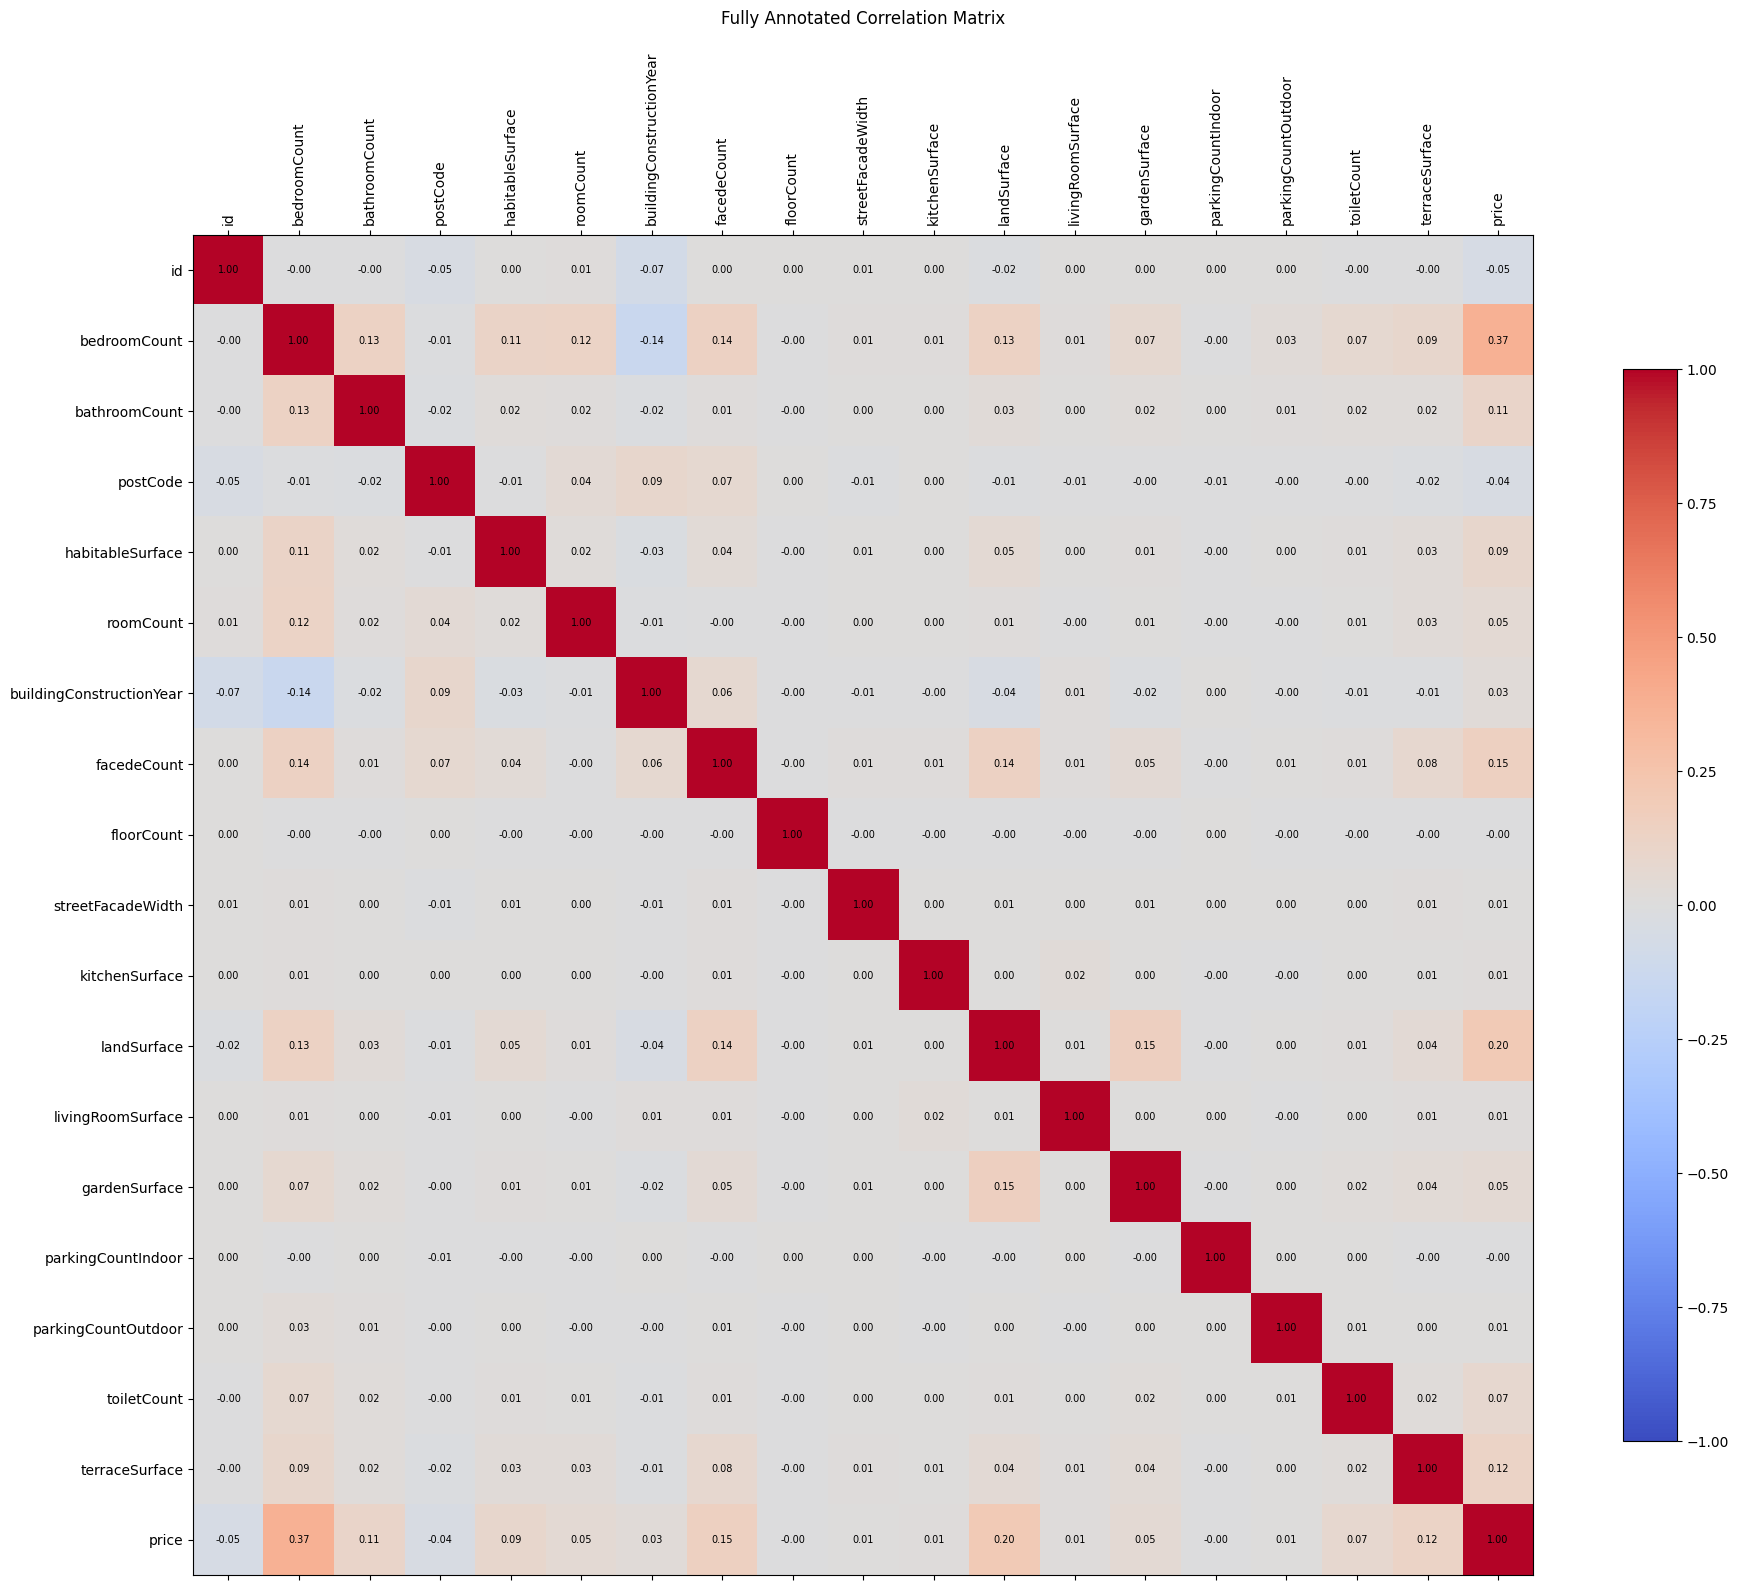

In [23]:
fig, ax = plt.subplots(figsize=(20,16))
cax = ax.matshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, shrink=0.8)

# tick labels
ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# manual annotation loop
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=7)

plt.title("Fully Annotated Correlation Matrix", pad=20)
plt.tight_layout()
fig.savefig("CLEANED-heatmap-withoutimpurity.png")
plt.show()

In [24]:
most_influential = corr_with_price.abs().sort_values(ascending=False).index[1:6]
least_influential = corr_with_price.abs().sort_values(ascending=True).index[:5]

print("Top 5 most influential:", most_influential.tolist())
print("Top 5 least influential:", least_influential.tolist())

Top 5 most influential: ['bedroomCount', 'landSurface', 'facedeCount', 'terraceSurface', 'bathroomCount']
Top 5 least influential: ['parkingCountIndoor', 'floorCount', 'streetFacadeWidth', 'parkingCountOutdoor', 'kitchenSurface']


In [25]:
# Quantitative = numeric types
quant_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()
# Qualitative = object / category types
qual_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Quantitative ({len(quant_cols)}): {quant_cols}")
print(f"Qualitative ({len(qual_cols)}): {qual_cols}")

Quantitative (19): ['id', 'bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'roomCount', 'buildingConstructionYear', 'facedeCount', 'floorCount', 'streetFacadeWidth', 'kitchenSurface', 'landSurface', 'livingRoomSurface', 'gardenSurface', 'parkingCountIndoor', 'parkingCountOutdoor', 'toiletCount', 'terraceSurface', 'price']
Qualitative (10): ['type', 'subtype', 'province', 'locality', 'buildingCondition', 'floodZoneType', 'heatingType', 'kitchenType', 'terraceOrientation', 'epcScore']


In [26]:
missing_count = df_cleaned.isnull().sum()
missing_pct   = (missing_count / len(df_cleaned) * 100).round(2)

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct'  : missing_pct
}).sort_values('missing_pct', ascending=False)

print(missing_summary.head(10))  # top 10 most-missing

                  missing_count  missing_pct
id                            0          0.0
type                          0          0.0
subtype                       0          0.0
bedroomCount                  0          0.0
bathroomCount                 0          0.0
province                      0          0.0
locality                      0          0.0
postCode                      0          0.0
habitableSurface              0          0.0
roomCount                     0          0.0


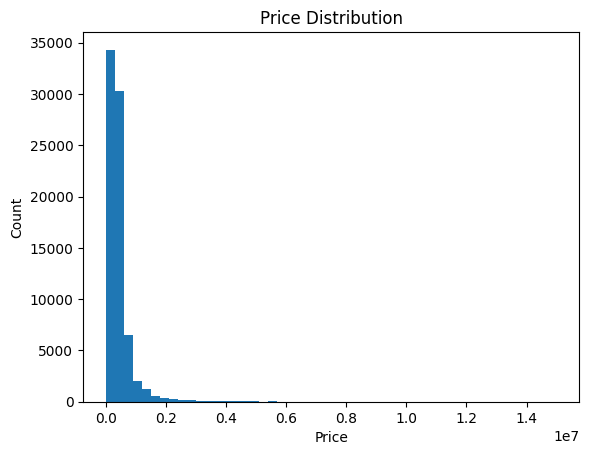

In [29]:
#Histogram of price
plt.hist(df_cleaned['price'], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
fig.savefig("CLEANED-price-distribution.png")
plt.show()

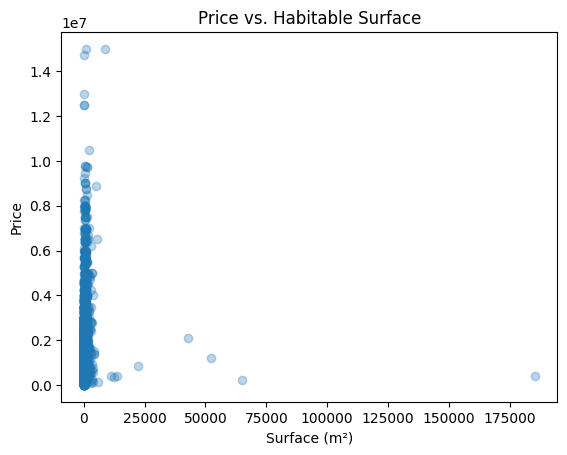

In [30]:
# Scatter price vs. habitableSurface
plt.scatter(df_cleaned['habitableSurface'], df_cleaned['price'], alpha=0.3)
plt.title("Price vs. Habitable Surface")
plt.xlabel("Surface (m²)")
plt.ylabel("Price")
fig.savefig("CLEANED-price-vs-habitableSurface.png")
plt.show()

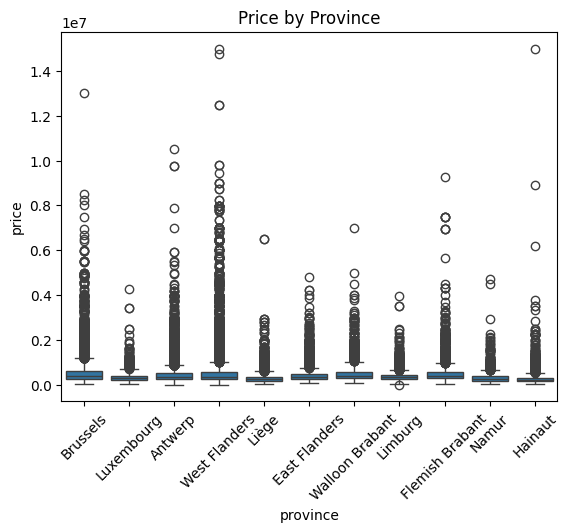

In [32]:
#Boxplot to spot outliers in price by province
sns.boxplot(x='province', y='price', data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Price by Province")
fig.savefig("CLEANED-price-by-province.png")
plt.show()

### Non-linear correlation
- Spearman Rank Correlation

In [ ]:
df_cleaned.info()

C:\Users\BeCode\AppData\Local\Temp\ipykernel_5136\4209008817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spearman_price_corr.values, y=spearman_price_corr.index, palette='viridis')


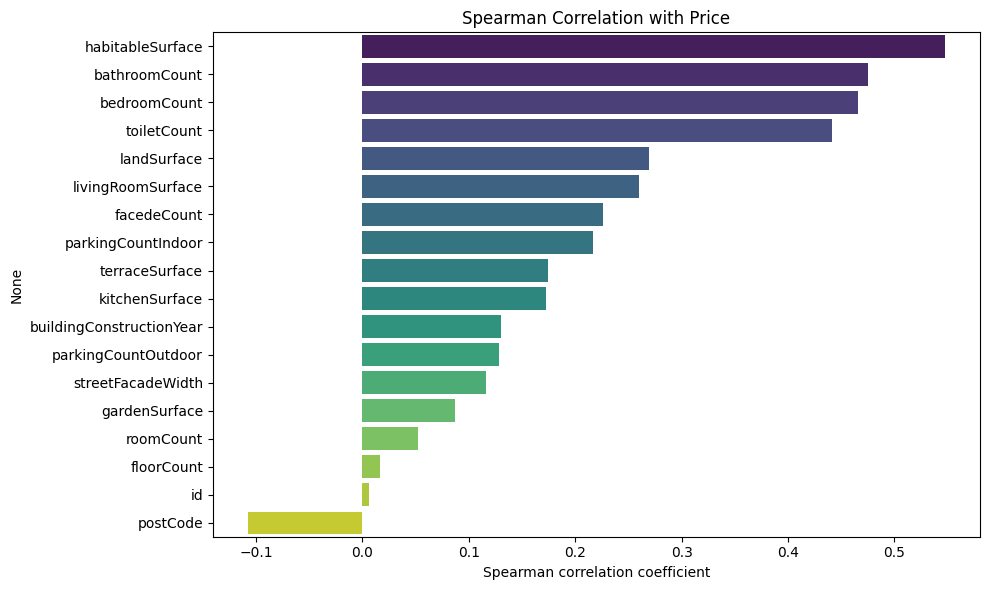

In [36]:
spearman_corr = numeric_df.corr(method='spearman')
spearman_price_corr = spearman_corr['price'].drop('price').sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=spearman_price_corr.values, y=spearman_price_corr.index, palette='viridis')
plt.title("Spearman Correlation with Price")
plt.xlabel("Spearman correlation coefficient")
plt.tight_layout()
fig.savefig("CLEANED-spearman-correlation-with-price.png")
plt.show()

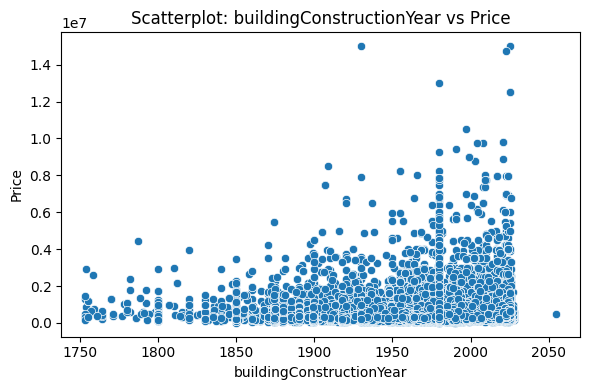

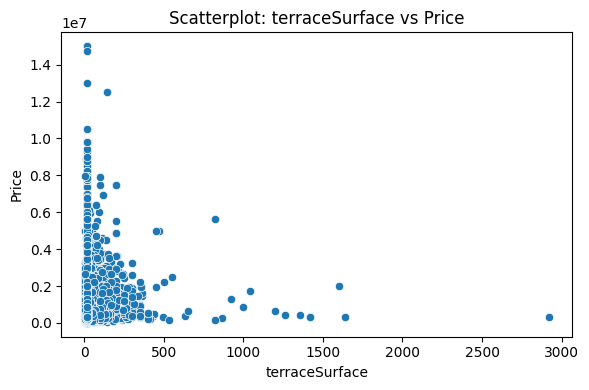

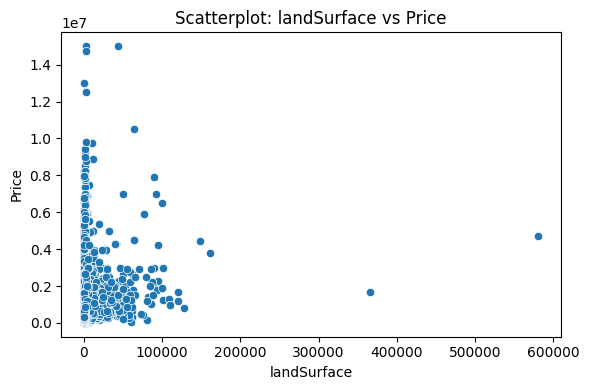

In [39]:
#Scatterplots for Visual Inspection
# For a few features (pick ones with low Pearson but possible importance)
features_to_check = ['buildingConstructionYear', 'terraceSurface', 'landSurface']

for feature in features_to_check:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=numeric_df[feature], y=numeric_df['price'])
    plt.title(f"Scatterplot: {feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.tight_layout()
    fig.savefig(f"CLEANED-{feature}-vs-price.png")
    plt.show()

In [ ]:
df_cleaned['bedroomCount'].value_counts()

bedroomCount
3.0      27413
2.0      21452
4.0      11653
1.0       7840
5.0       4430
6.0       1881
7.0        677
8.0        347
9.0        166
10.0       129
12.0        71
11.0        69
14.0        43
13.0        38
15.0        31
18.0        21
16.0        20
17.0        13
20.0        11
25.0         7
30.0         6
22.0         6
23.0         5
33.0         4
35.0         4
24.0         4
19.0         4
21.0         4
34.0         3
29.0         3
36.0         2
100.0        2
60.0         1
47.0         1
62.0         1
63.0         1
31.0         1
41.0         1
97.0         1
32.0         1
26.0         1
70.0         1
Name: count, dtype: int64

In [41]:
df_cleaned['bathroomCount'].value_counts()



bathroomCount
1.0       59011
2.0       12454
3.0        2764
4.0        1097
5.0         485
6.0         238
7.0         106
8.0          63
9.0          36
10.0         29
11.0         15
12.0         15
16.0          8
15.0          8
14.0          8
13.0          8
18.0          6
17.0          4
23.0          2
29.0          2
22.0          1
30.0          1
20.0          1
19.0          1
34.0          1
24.0          1
57.0          1
1146.0        1
71.0          1
21.0          1
Name: count, dtype: int64

In [42]:
df_cleaned.iloc[[df_cleaned['bathroomCount'].idxmax()]]

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,parkingCountOutdoor,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
45771,20652365.0,HOUSE,HOUSE,4.0,2.0,Hainaut,Charleroi Couillet,6010,235.0,6.0,...,2.0,True,True,3.0,True,True,15.0,SOUTH,B,190000.0
